In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font',family='Arial') 

In [3]:
bin_650=pd.read_csv(r"D:\Workstation\cMECOS-upload-data\Table S3.csv")

In [4]:
# revise the tax annotion

In [5]:
bin_650["Phylum"]=bin_650["Phylum"].map({"p__Firmicutes_A":"Firmicutes","p__Firmicutes_C":"Firmicutes","p__Firmicutes":"Firmicutes",
                      "p__Bacteroidota":"Bacteroidetes","p__Actinobacteriota":"Actinobacteria","p__Fusobacteriota":"Fusobacteria",
                                        "p__Proteobacteria":"Proteobacteria"})

In [6]:
bin_650["Culture4"]=bin_650["Culture"].map({"mrs-24h":"mrs","mrs-12h":"mrs","aerobic-12h":"aerobic","aerobic-24h":"aerobic",
                        "anaerobic-12h":"anaerobic","anaerobic-24h":"anaerobic","unculture":"UG"})

In [7]:
plot_data=bin_650[["cMECOS-MAG-ID","Phylum","Culture4"]]

In [8]:
colors={"UG":"#b5d2e2","aerobic":"#d89b68","anaerobic":"#e8c3a5","mrs":"#efd7c2"}

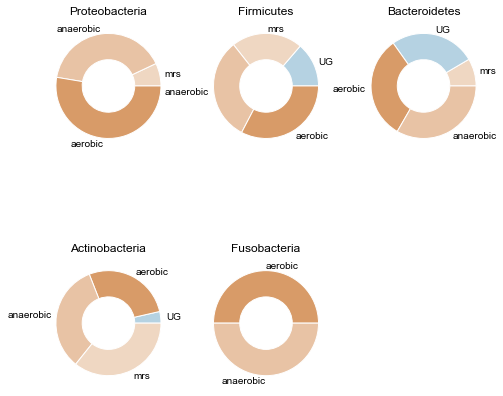

In [9]:
fig=plt.figure(figsize=[8,8])

for i,x in enumerate(plot_data["Phylum"].unique()):
    ax=fig.add_subplot(2,3,i+1)
    Phy=x
    names=plot_data[plot_data["Phylum"]==Phy]["Culture4"].value_counts().sort_values().index.tolist()
    size=plot_data[plot_data["Phylum"]==Phy]["Culture4"].value_counts().sort_values().tolist()
    cc=[colors[i]  for i in names] 

    plt.pie(size, labels=names,wedgeprops=dict(width=0.5, edgecolor='w'),colors=cc)
    plt.title(Phy)
# fig.savefig("fig1_pie.pdf")